In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats

In [5]:
## Import all necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import norm
import pylab

# Solving Problem 1
## Wholesale Customers Analysis (Download Data) 
### Problem Statement: A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


In [6]:
##Load the data set 
df= pd.read_csv("Wholesale+Customers+Data.csv")

# Check Data top rows
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [7]:
## Check Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [8]:
# Check Data distribution Pattern
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440,440,440.00,440.00,440.00,440.00,440.00,440.00
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.50,NaN,NaN,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,NaN,NaN,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,NaN,NaN,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,NaN,NaN,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,NaN,NaN,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,NaN,NaN,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25


## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [9]:
df["total_amount_spent"]=df["Fresh"]+df["Milk"]+df["Grocery"]+df["Frozen"]+df["Detergents_Paper"]+df["Delicatessen"]
df_channel = pd.DataFrame(df.groupby("Channel")["total_amount_spent"].sum().reset_index())
df_channel.head()

,Channel,total_amount_spent
0,Hotel,7999569
1,Retail,6619931


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


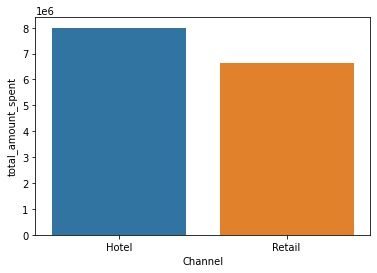

In [10]:
sns.barplot(df_channel["Channel"],df_channel["total_amount_spent"],data=df_channel);

#### We can clearly see in above Bar Plot that in the "Hotel" Channel , amount was spent most and "Retail" Channel spent less Amount

In [11]:
df_Region = pd.DataFrame(df.groupby("Region")["total_amount_spent"].sum().reset_index())
df_Region

,Region,total_amount_spent
0,Lisbon,2386813
1,Oporto,1555088
2,Other,10677599


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


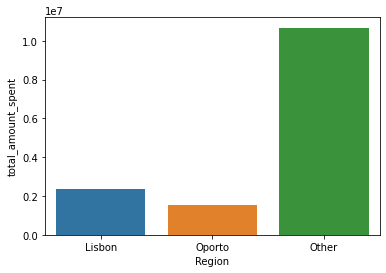

In [12]:
sns.barplot(df_Region["Region"],df_Region["total_amount_spent"]);

#### We can clearly see in above Bar Plot that in the "Other" Region , amount was spent most and "Oporto" Region spent least Amount

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [13]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total_amount_spent
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87,33226.14
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11,26356.30
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00,904.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25,17448.75
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50,27492.00
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25,41307.50
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00,199891.00


In [14]:
new_index=['Hotel','Retail']
df_channel=df.groupby("Channel").sum().reset_index().T
df_channel

,0,1
Channel,Hotel,Retail
Buyer/Spender,71034,25986
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988
total_amount_spent,7999569,6619931


In [15]:
df_channel.columns=new_index
df_channel

,Hotel,Retail
Channel,Hotel,Retail
Buyer/Spender,71034,25986
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988
total_amount_spent,7999569,6619931


In [16]:
df_channel = df_channel.iloc[2:]
df_channel

,Hotel,Retail
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988
total_amount_spent,7999569,6619931


In [17]:
df_channel = df_channel.iloc[:6]
df_channel

,Hotel,Retail
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988


In [18]:
df_channe2= pd.DataFrame(df_channel.reset_index())
df_channe2

,index,Hotel,Retail
0,Fresh,4015717,1264414
1,Milk,1028614,1521743
2,Grocery,1180717,2317845
3,Frozen,1116979,234671
4,Detergents_Paper,235587,1032270
5,Delicatessen,421955,248988


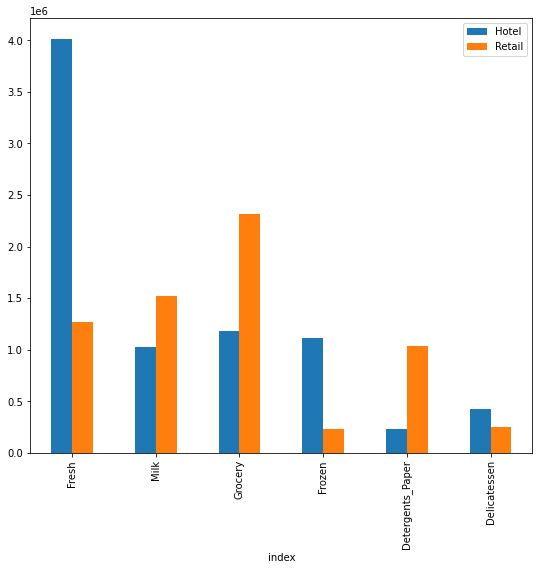

In [19]:
df_channe2.plot(x="index", y=["Hotel", "Retail"], kind="bar",figsize=(9,8))
plt.show()

#### From Above graph we can see that "Hotel" has spend most of the amount in "Fresh" product and least in "Detergents_Paper" 
#### And also "Retail" has spend most of the amount in "Grocery" product and least in "Frozen" 

In [20]:
df.groupby("Region").max().reset_index().T

,0,1,2
Region,Lisbon,Oporto,Other
Buyer/Spender,273,340,440
Channel,Retail,Retail,Retail
Fresh,56083,32717,112151
Milk,28326,25071,73498
Grocery,39694,67298,92780
Frozen,18711,60869,36534
Detergents_Paper,19410,38102,40827
Delicatessen,6854,5609,47943
total_amount_spent,107155,130877,199891


In [21]:
new_index=['Lisbon','Oporto','Other']
df_Region=df.groupby("Region").sum().reset_index().T
df_Region
df_Region.columns=new_index
df_Region
df_Region = df_Region.iloc[2:8]
df_Region
df_Region2= pd.DataFrame(df_Region.reset_index())
df_Region2

,index,Lisbon,Oporto,Other
0,Fresh,854833,464721,3960577
1,Milk,422454,239144,1888759
2,Grocery,570037,433274,2495251
3,Frozen,231026,190132,930492
4,Detergents_Paper,204136,173311,890410
5,Delicatessen,104327,54506,512110


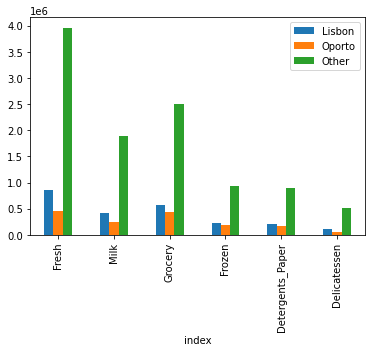

In [22]:
df_Region2.plot(x="index", y=["Lisbon", "Oporto","Other"], kind="bar", figsize=(6,4))
plt.show()

#### From Above graph we can see that "Lisbon" has spend most of the amount in "Fresh" product and least in "Delicatessen" 
#### And also "Oporto" has spend most of the amount in "Fresh" product and least in "Delicatessen" 
#### And also "Other" has spend most of the amount in "Fresh" product and least in "Delicatessen" 

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [23]:
df
df_items=df[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]]
df_items

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [24]:
df_items2=df_items.describe().T.reset_index()
df_items2

,index,count,mean,std,min,25%,50%,75%,max
0,Fresh,440.00,12000.30,12647.33,3.00,3127.75,8504.00,16933.75,112151.00
1,Milk,440.00,5796.27,7380.38,55.00,1533.00,3627.00,7190.25,73498.00
2,Grocery,440.00,7951.28,9503.16,3.00,2153.00,4755.50,10655.75,92780.00
3,Frozen,440.00,3071.93,4854.67,25.00,742.25,1526.00,3554.25,60869.00
4,Detergents_Paper,440.00,2881.49,4767.85,3.00,256.75,816.50,3922.00,40827.00
5,Delicatessen,440.00,1524.87,2820.11,3.00,408.25,965.50,1820.25,47943.00


In [25]:
df_items3=df_items2[["index","std","mean"]]
df_items3

,index,std,mean
0,Fresh,12647.33,12000.30
1,Milk,7380.38,5796.27
2,Grocery,9503.16,7951.28
3,Frozen,4854.67,3071.93
4,Detergents_Paper,4767.85,2881.49
5,Delicatessen,2820.11,1524.87


In [26]:
df_items3["variance"]=df_items3["std"]/df_items3["mean"]
df_items3 = df_items3.sort_values(by="variance")
df_items3

<ipython-input-26-3acb8cb76eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items3["variance"]=df_items3["std"]/df_items3["mean"]


,index,std,mean,variance
0,Fresh,12647.33,12000.30,1.05
2,Grocery,9503.16,7951.28,1.20
1,Milk,7380.38,5796.27,1.27
3,Frozen,4854.67,3071.93,1.58
4,Detergents_Paper,4767.85,2881.49,1.65
5,Delicatessen,2820.11,1524.87,1.85


<AxesSubplot:xlabel='index', ylabel='variance'>

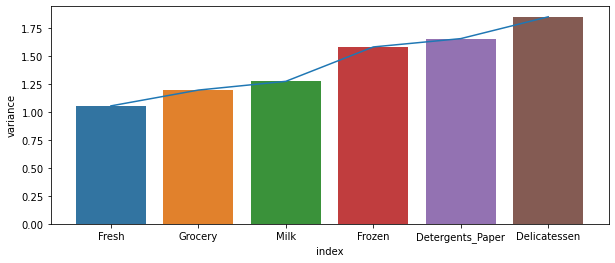

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x=df_items3["index"],y=df_items3["variance"])
sns.lineplot(x=df_items3["index"],y=df_items3["variance"])

#### From above Chart we can clearly see that the variance for the Delicatessen is Most, thats why the most inconsistent behaviour is for the product "Delicatessen" and inconsistent behaviour is for "Fresh" products

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

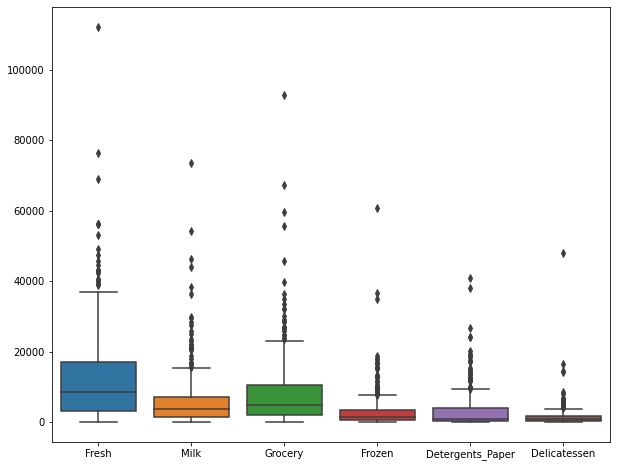

In [28]:
#plt.figure(figsize=(10,15))
plt.figure(figsize=(10,8))
sns.boxplot(data=df_items);

#### Based on Boxplot we can see that we have outliers for every product.

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [29]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total_amount_spent
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87,33226.14
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11,26356.30
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00,904.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25,17448.75
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50,27492.00
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25,41307.50
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00,199891.00


In [30]:
df_items3["variance"]=df_items3["std"]/df_items3["mean"]
df_items3 = df_items3.sort_values(by="variance")
df_items3

,index,std,mean,variance
0,Fresh,12647.33,12000.30,1.05
2,Grocery,9503.16,7951.28,1.20
1,Milk,7380.38,5796.27,1.27
3,Frozen,4854.67,3071.93,1.58
4,Detergents_Paper,4767.85,2881.49,1.65
5,Delicatessen,2820.11,1524.87,1.85


### Since we do not have enough data available in data source, example: profit or loss information, we can not judge if spendng more money on any product is good for the business or spending less money is good,

### If we ASSUME that profits are same in ration for all the products , and bassed on variance in above chart we can suggest that Spending behaviour has lot of variations in Product "Delicatessen" so amount spend should be equally distributed in all of the products, to forseen the future market.

# Solving Problem 2  

## The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [31]:
stud_srvey = pd.read_csv("Survey.csv")
stud_srvey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [32]:
stud_srvey.groupby(["Gender","Computer"]).count().reset_index()

,Gender,Computer,ID,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Text Messages
0,Female,Desktop,2,2,2,2,2,2,2,2,2,2,2,2
1,Female,Laptop,29,29,29,29,29,29,29,29,29,29,29,29
2,Female,Tablet,2,2,2,2,2,2,2,2,2,2,2,2
3,Male,Desktop,3,3,3,3,3,3,3,3,3,3,3,3
4,Male,Laptop,26,26,26,26,26,26,26,26,26,26,26,26


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

In [33]:
stud_gender_major=pd.crosstab(stud_srvey['Gender'],stud_srvey['Major'])
stud_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


## 2.1.2. Gender and Grad Intention

In [34]:
stud_gender_grad_intention=pd.crosstab(stud_srvey['Gender'],stud_srvey['Grad Intention']).reset_index()
stud_gender_grad_intention

Grad Intention,Gender,No,Undecided,Yes
0,Female,9,13,11
1,Male,3,9,17


## 2.1.3. Gender and Employment

In [35]:
stud_gender_employment=pd.crosstab(stud_srvey['Gender'],stud_srvey['Employment']).reset_index()
stud_gender_employment

Employment,Gender,Full-Time,Part-Time,Unemployed
0,Female,3,24,6
1,Male,7,19,3


## 2.1.4. Gender and Computer

In [36]:
stud_gender_computer=pd.crosstab(stud_srvey['Gender'],stud_srvey['Computer']).reset_index()
stud_gender_computer

Computer,Gender,Desktop,Laptop,Tablet
0,Female,2,29,2
1,Male,3,26,0


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [37]:
stud_srvey

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.40,Part-Time,40.00,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.90,Part-Time,40.00,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.50,Part-Time,55.00,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.50,Part-Time,30.00,2,3,490,Laptop,50


In [38]:
male_count=stud_srvey[stud_srvey["Gender"]=="Male"]["ID"].count()
male_count

29

In [39]:
total_count=stud_srvey["ID"].count()
total_count

62

In [40]:
probability_of_male = male_count/total_count
probability_of_male

0.46774193548387094

In [41]:
print('The probability that a random selected CMSU student will be a male is : ', round(probability_of_male,2))

The probability that a random selected CMSU student will be a male is :  0.47


## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [42]:
female_count=stud_srvey[stud_srvey["Gender"]=="Female"]["ID"].count()
female_count

33

In [43]:
probability_of_female = female_count/total_count
probability_of_female

0.532258064516129

In [44]:
print('The probability that a random selected CMSU student will be a male is : ', round(probability_of_female,2))

The probability that a random selected CMSU student will be a male is :  0.53


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [45]:
## As we calculated in above cells Contengency table for Male student is as follows
stud_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [46]:
male_count

29

In [47]:
print('The probability that a random selected CMSU Male student taking Accounting as a major', 4/male_count)

The probability that a random selected CMSU Male student taking Accounting as a major 0.13793103448275862


In [48]:
print('The probability that a random selected CMSU Male student taking CIS as a major', 1/male_count*100)

The probability that a random selected CMSU Male student taking CIS as a major 3.4482758620689653


In [49]:
print('The probability that a random selected CMSU Male student taking Economics/Finance as a major', 4/male_count)

The probability that a random selected CMSU Male student taking Economics/Finance as a major 0.13793103448275862


In [50]:
print('The probability that a random selected CMSU Male student taking International Business as a major', 2/male_count)

The probability that a random selected CMSU Male student taking International Business as a major 0.06896551724137931


In [51]:
print('The probability that a random selected CMSU Male student taking Management as a major', 6/male_count)

The probability that a random selected CMSU Male student taking Management as a major 0.20689655172413793


In [52]:
print('The probability that a random selected CMSU Male student taking Other as a major', 4/male_count)

The probability that a random selected CMSU Male student taking Other as a major 0.13793103448275862


In [53]:
print('The probability that a random selected CMSU Male student taking Retailing/Marketing as a major', 5/male_count)

The probability that a random selected CMSU Male student taking Retailing/Marketing as a major 0.1724137931034483


In [54]:
print('The probability that a random selected CMSU Male student and not yet Decided for any major', 3/male_count)

The probability that a random selected CMSU Male student and not yet Decided for any major 0.10344827586206896


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [55]:
## As we calculated in above cells Contengency table for Male student is as follows
stud_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [56]:
female_count

33

In [57]:
print('The probability that a random selected CMSU Female student taking Accounting as a major', 3/female_count)

The probability that a random selected CMSU Female student taking Accounting as a major 0.09090909090909091


In [58]:
print('The probability that a random selected CMSU Female student taking CIS as a major', 1/female_count)

The probability that a random selected CMSU Female student taking CIS as a major 0.030303030303030304


In [59]:
print('The probability that a random selected CMSU Female student taking Economics/Finance as a major', 7/female_count)

The probability that a random selected CMSU Female student taking Economics/Finance as a major 0.21212121212121213


In [60]:
print('The probability that a random selected CMSU Female student taking International Business	 as a major', 4/female_count)

The probability that a random selected CMSU Female student taking International Business	 as a major 0.12121212121212122


In [61]:
print('The probability that a random selected CMSU Female student taking Management as a major', 4/female_count)

The probability that a random selected CMSU Female student taking Management as a major 0.12121212121212122


In [62]:
print('The probability that a random selected CMSU Female student taking Other as a major', 3/female_count)

The probability that a random selected CMSU Female student taking Other as a major 0.09090909090909091


In [63]:
print('The probability that a random selected CMSU Female student taking Retailing/Marketing as a major', 9/female_count)

The probability that a random selected CMSU Female student taking Retailing/Marketing as a major 0.2727272727272727


In [64]:
print('The probability that a random selected CMSU Female student and not yet Decided for any major', 0/female_count)

The probability that a random selected CMSU Female student and not yet Decided for any major 0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [67]:
stud_gender_grad_intention

Grad Intention,Gender,No,Undecided,Yes
0,Female,9,13,11
1,Male,3,9,17


In [68]:
17/total_count

0.27419354838709675

In [66]:
## Count of Male candidate Intended for graduation/ Total male Candidate
print('The probability That a randomly chosen student is a male and intends to graduate is', 17/29 )

The probability That a randomly chosen student is a male and intends to graduate is 0.5862068965517241


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [735]:
stud_gender_computer

Computer,Gender,Desktop,Laptop,Tablet
0,Female,2,29,2
1,Male,3,26,0


In [857]:
## Count of Female candidate dont have Laptop (2+2) = 4/ Total Female Candidate

print('The probability That a randomly chosen student is a Female and Dont have Laptop is ', 4/33 )

The probability That a randomly chosen student is a Female and Dont have Laptop is  0.12121212121212122


In [71]:
4/total_count

0.06451612903225806

## 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [72]:
stud_gender_employment

Employment,Gender,Full-Time,Part-Time,Unemployed
0,Female,3,24,6
1,Male,7,19,3


In [73]:
male_count

29

In [74]:
total_count

62

In [75]:
prob_for_being_male = 29/62

In [76]:
prob_for_full_time_emp= (7+3)/62

In [77]:
prob_full_time_emp_and_male = 7/62

In [78]:
## P of (A OR B) = P{A) + P(B) - P(A intersect B)
prob_male_plus_full_time_empl= prob_for_being_male+ prob_for_full_time_emp - prob_full_time_emp_and_male
prob_male_plus_full_time_empl

0.5161290322580645

In [79]:
print('The probability of  randomly chosen student is a male or has a full-time employment is',prob_male_plus_full_time_empl)

The probability of  randomly chosen student is a male or has a full-time employment is 0.5161290322580645


## 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management

In [80]:
stud_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [81]:
female_count

33

In [82]:
total_count

62

In [83]:
prob_major_in_inter_busins = 4/33

In [84]:
prob_major_in_management = 4/33

In [85]:
prob_major_in_inter_and_mgmt = prob_major_in_inter_busins + prob_major_in_management
prob_major_in_inter_and_mgmt
print('The probability of  randomly chosen student is a Female and she is majoring in international business or management',prob_major_in_inter_and_mgmt)

The probability of  randomly chosen student is a Female and she is majoring in international business or management 0.24242424242424243


## 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [86]:
stud_gender_grad_intention=pd.crosstab(stud_srvey['Gender'],stud_srvey[stud_srvey['Grad Intention']!="Undecided"]["Grad Intention"]).reset_index()
stud_gender_grad_intention

Grad Intention,Gender,No,Yes
0,Female,9,11
1,Male,3,17


In [790]:
print(stud_gender_grad_intention.sum())

Grad Intention
Gender    FemaleMale
No                12
Yes               28
dtype: object


In [792]:
print('Probability of graduate intention is', 28/40)

Probability of graduate intention is 0.7


In [791]:
print('Probability of graduate intention being female is',11/20)

Probability of graduate intention being female is 0.55


In [859]:
print("We call Events as independent when thier probabilities are not equal, Hence from above result we can say ")
print(" that Being Female and graduate intention is not dependent ")

We call Events as independent when thier probabilities are not equal, Hence from above result we can say 
 that Being Female and graduate intention is not dependent 


## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

In [390]:
new_stud_srvey = stud_srvey[["GPA","Salary","Spending","Text Messages"]]
new_stud_srvey

,GPA,Salary,Spending,Text Messages
0,2.90,50.00,350,200
1,3.60,25.00,360,50
2,2.50,45.00,600,200
3,2.50,40.00,600,250
4,2.80,40.00,500,100
...,...,...,...,...
57,2.40,40.00,1000,10
58,2.90,40.00,350,250
59,2.50,55.00,500,500
60,3.50,30.00,490,50


### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [796]:
stud_gpa_lt_3=new_stud_srvey[new_stud_srvey['GPA']<3]
stud_gpa_lt_3["GPA"].count()

17

In [798]:
new_stud_srvey["GPA"].count()

62

In [799]:
prob_gpa_lt_3 = stud_gpa_lt_3["GPA"].count() / new_stud_srvey["GPA"].count()
prob_gpa_lt_3

0.27419354838709675

In [800]:
print('Probability that if a student is chosen randomly his/her GPA is less than 3 is',prob_gpa_lt_3 )

Probability that if a student is chosen randomly his/her GPA is less than 3 is 0.27419354838709675


## 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [88]:
new_stud_male = stud_srvey[stud_srvey['Gender']=='Male']
new_stud_male
new_stud_male_50_sal=new_stud_male[new_stud_male['Salary']>=50]
new_stud_male_50_sal

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
14,15,Male,21,Senior,Management,Yes,3.20,Part-Time,54.00,3,4,600,Laptop,400
17,18,Male,21,Junior,Economics/Finance,Undecided,3.10,Part-Time,55.00,2,3,600,Laptop,300
18,19,Male,19,Junior,Economics/Finance,Yes,3.50,Part-Time,52.00,2,5,500,Laptop,300
21,22,Male,18,Sophomore,Accounting,Undecided,3.00,Unemployed,60.00,1,4,600,Laptop,500
25,26,Male,24,Senior,Management,Yes,3.30,Full-Time,60.00,0,1,300,Laptop,40
26,27,Male,20,Junior,Economics/Finance,Yes,3.10,Full-Time,65.00,1,5,375,Laptop,300
28,29,Male,22,Senior,Retailing/Marketing,Yes,3.30,Part-Time,55.00,1,6,1100,Laptop,60
30,31,Male,20,Junior,Accounting,Undecided,3.40,Part-Time,55.00,2,3,500,Laptop,750
38,39,Male,24,Junior,Economics/Finance,Yes,2.80,Part-Time,50.00,1,6,600,Laptop,50
39,40,Male,19,Sophomore,Retailing/Marketing,Yes,2.50,Unemployed,50.00,2,5,300,Laptop,100


In [89]:
prob_new_stud_male_50_sal= new_stud_male_50_sal["ID"].count()/new_stud_male["ID"].count()
prob_new_stud_male_50_sal

0.4827586206896552

In [90]:
print('Probability that if  randomly selected male earns 50 or more is',prob_new_stud_male_50_sal)

Probability that if  randomly selected male earns 50 or more is 0.4827586206896552


### 2.8 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

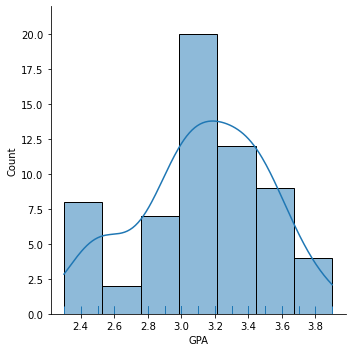

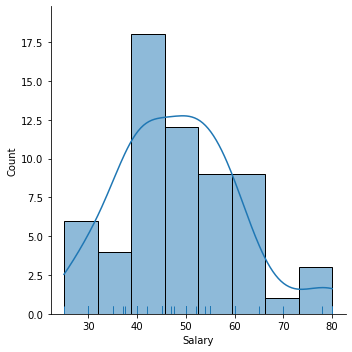

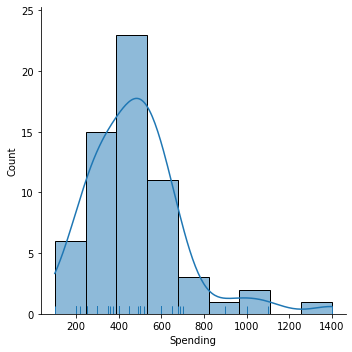

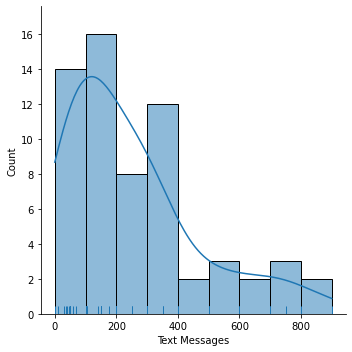

In [811]:
sns.displot(data=stud_srvey["GPA"],kde=True,rug=True)
sns.displot(data=stud_srvey["Salary"],kde=True,rug=True)
sns.displot(data=stud_srvey["Spending"],kde=True,rug=True)
sns.displot(data=stud_srvey["Text Messages"],kde=True,rug=True)

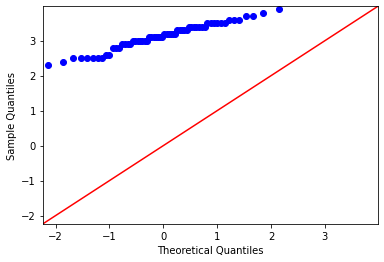

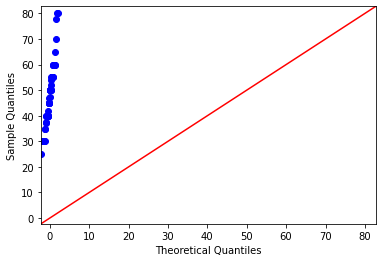

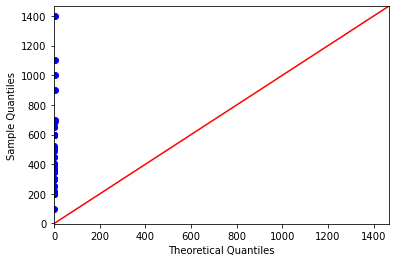

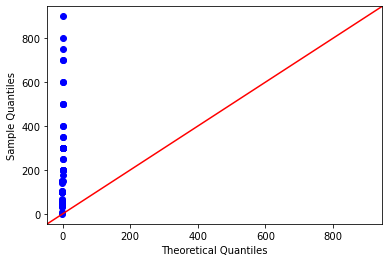

In [812]:
my_data_gpa = stud_srvey["GPA"]
my_data_salary = stud_srvey["Salary"]
my_data_spending = stud_srvey["Spending"]
my_data_text_messages = stud_srvey["Text Messages"]

sm.qqplot(my_data_gpa, line='45')
sm.qqplot(my_data_salary, line='45')
sm.qqplot(my_data_spending, line='45')
sm.qqplot(my_data_text_messages, line='45')
pylab.show()

### Based on the Dist Plot and QQ Plot, we can see that GPA and salary are normally distributed but spending and Text messages are not normally distributed

# Problem 3 (Download Data)

## An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

## The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [105]:
shdf= pd.read_csv("A+&+B+shingles.csv")
shdf

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Declare Null and Alternate Hypothesis

Ho= MC >= 0.35
Ha= MC < 0.35

## Check for Shingle A

In [106]:
from scipy.stats import   ttest_1samp , ttest_ind
shdf['A'].count()

36

In [107]:
t_statistic, p_value = ttest_1samp(shdf['A'], 0.35)

print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))
## Since it is not a 2 tail test, so we need to Divide p_value by 2

actual_p_value= p_value/2
alpha_value = 0.05

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [99]:
if actual_p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since actual_p_value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since actual_p_value > Level of significance') 

print ("Our one-sample t-test p-value=", actual_p_value)

print("Null Hypothisis is True , it means Moisture content is Greater than 0.35")

We have no evidence to reject the null hypothesis since actual_p_value > Level of significance
Our one-sample t-test p-value= 0.07477633144907513
Null Hypothisis is True , it means Moisture content is Greater than 0.35


## Check for Shingle B

In [831]:
from scipy.stats import   ttest_1samp , ttest_ind
shdf['B']

0    0.14
1    0.15
2    0.31
3    0.16
4    0.37
5    0.18
6    0.42
7    0.58
8    0.25
9    0.41
10   0.17
11   0.13
12   0.23
13   0.11
14   0.10
15   0.19
16   0.22
17   0.44
18   0.11
19   0.11
20   0.31
21   0.43
22   0.26
23   0.18
24   0.44
25   0.43
26   0.16
27   0.52
28   0.36
29   0.22
30   0.39
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
Name: B, dtype: float64

In [833]:
#removing NULL for Shingle B
shdf_B= shdf['B'].dropna()
shdf_B

0    0.14
1    0.15
2    0.31
3    0.16
4    0.37
5    0.18
6    0.42
7    0.58
8    0.25
9    0.41
10   0.17
11   0.13
12   0.23
13   0.11
14   0.10
15   0.19
16   0.22
17   0.44
18   0.11
19   0.11
20   0.31
21   0.43
22   0.26
23   0.18
24   0.44
25   0.43
26   0.16
27   0.52
28   0.36
29   0.22
30   0.39
Name: B, dtype: float64

In [834]:
shdf_B.count()

31

In [835]:
t_statistic, p_value = ttest_1samp(shdf_B, 0.35)

print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))
## Since it is not a 2 tail test, so we need to Divide p_value by 2

actual_p_value= p_value/2
alpha_value = 0.05

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191813 


In [837]:
if actual_p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", actual_p_value)

print("Alternate Hypothisis is True , it means Moisture content is Less than 0.35")

We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.0020904774003191813
Alternate Hypothisis is True , it means Moisture content is Less than 0.35


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Ho= meanA = meanB
Ha= meanA != meanB

In [840]:
shdf

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [841]:
t_statistic, p_value  = ttest_ind(shdf['A'],shdf['B'], equal_var=True,nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)

tstat 1.2896282719661123
P Value 0.2017496571835306


In [844]:
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", actual_p_value)

We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.0020904774003191813
